In [5]:
# LIBRARIES INSTALLATION
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install pytest-warnings

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# LIBRARIES IMPORT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

In [6]:
df = pd.read_csv('/exchange/dspro01/group3/data/train_labels.csv', sep=',')

In [7]:
df.shape

(16488, 9)

In [8]:
df.head(5)

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df.dtypes

id                   object
antelope_duiker     float64
bird                float64
blank               float64
civet_genet         float64
hog                 float64
leopard             float64
monkey_prosimian    float64
rodent              float64
dtype: object

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.describe()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
count,16488.000000,16488.000000,16488.000000,16488.000000,16488.000000,16488.000000,16488.000000,16488.000000
mean,0.150049,0.099527,0.134219,0.146955,0.059316,0.136705,0.151140,0.122089
std,0.357130,0.299377,0.340898,0.354072,0.236222,0.343547,0.358196,0.327398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
for column in df.columns:
    print(f"Verteilung für {column}:")
    print(df[column].value_counts())
    print()

Verteilung für id:
id
ZJ016487    1
ZJ000000    1
ZJ000001    1
ZJ000002    1
ZJ000003    1
           ..
ZJ000012    1
ZJ000011    1
ZJ000010    1
ZJ000009    1
ZJ000008    1
Name: count, Length: 16488, dtype: int64

Verteilung für antelope_duiker:
antelope_duiker
0.0    14014
1.0     2474
Name: count, dtype: int64

Verteilung für bird:
bird
0.0    14847
1.0     1641
Name: count, dtype: int64

Verteilung für blank:
blank
0.0    14275
1.0     2213
Name: count, dtype: int64

Verteilung für civet_genet:
civet_genet
0.0    14065
1.0     2423
Name: count, dtype: int64

Verteilung für hog:
hog
0.0    15510
1.0      978
Name: count, dtype: int64

Verteilung für leopard:
leopard
0.0    14234
1.0     2254
Name: count, dtype: int64

Verteilung für monkey_prosimian:
monkey_prosimian
0.0    13996
1.0     2492
Name: count, dtype: int64

Verteilung für rodent:
rodent
0.0    14475
1.0     2013
Name: count, dtype: int64



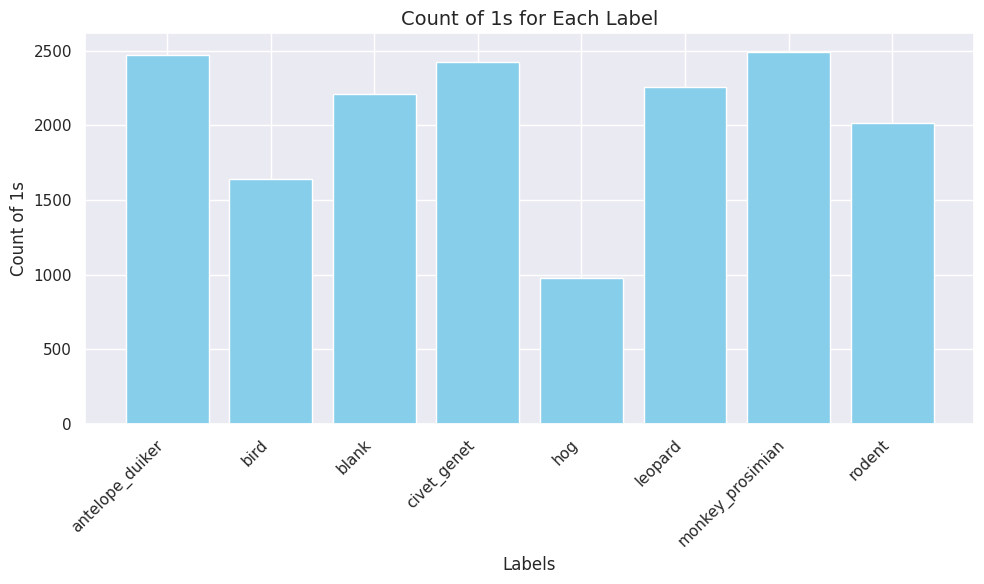

In [13]:
import matplotlib.pyplot as plt

labels_df = df.drop(columns=['id'])

label_counts = (labels_df == 1).sum()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')

plt.title('Count of 1s for Each Label', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count of 1s', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


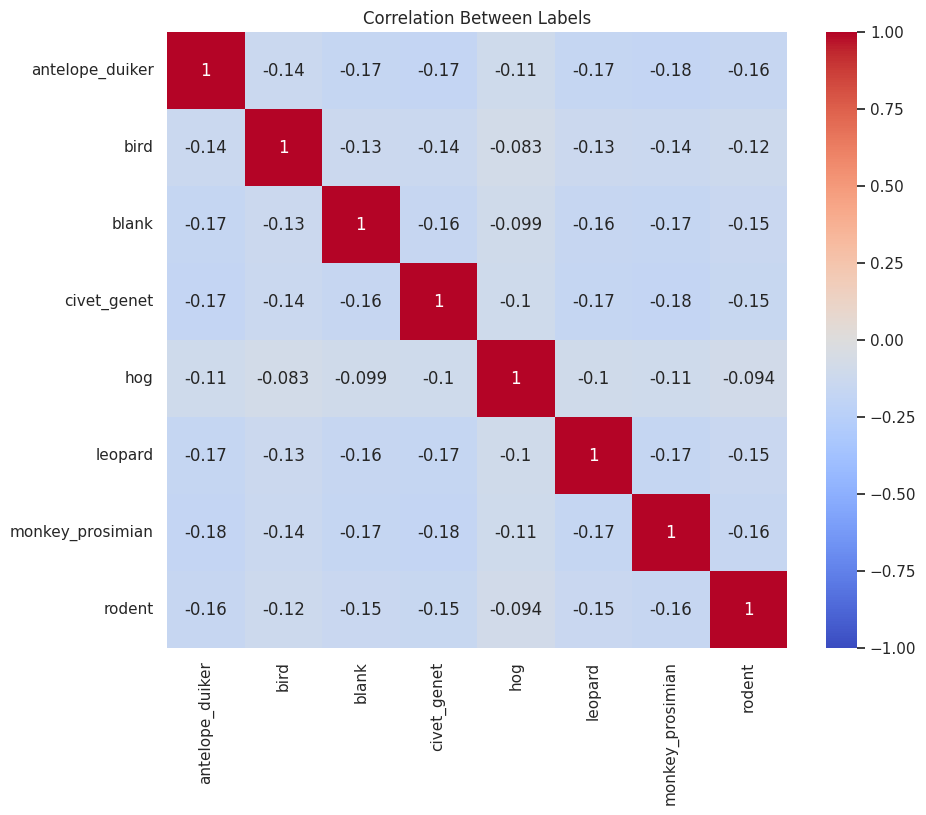

In [14]:
corr_matrix = labels_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Between Labels')
plt.show()